# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- example based on https://randlow.github.io/posts/finance-economics/asset-pricing-regression/
- Reading data from Ken French's website using Python: https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_Fi

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


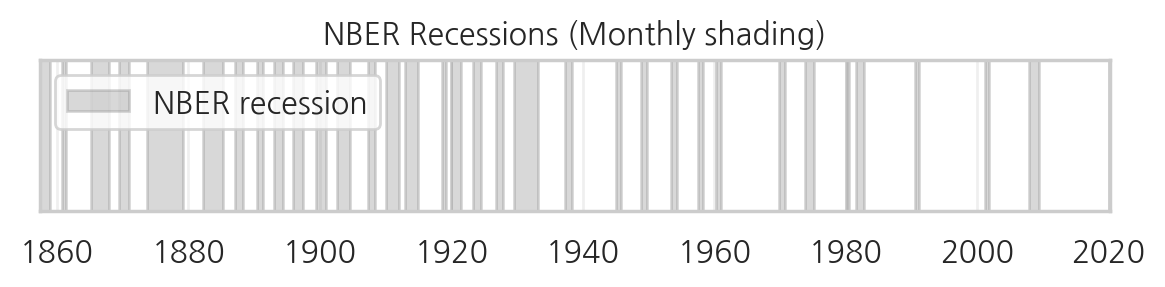

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

- Ken French 웹사이트(https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 에서 데이터 불러오기
- 주요 요인들의 누적 수익률 시계열
- CAPM으로 가치 효과를 설명할 수 있는가?
- Fama and French (1996)
  - size와 B/M으로 정렬된 FF25 포트폴리오의 평균 수익률과 베타 3D 그래프
  - Fama and French (1996)의 Table 1 replication
  - FF3 모형이 이상현상을 어떻게 설명하는가?
- 연습문제: 펀드 평가
  - 9개 펀드의 알파를 CAPM, FF3, FF3+모멘텀 모형으로 평가하기

## Datasets in Ken French's Website

- import data from Fama-French website

In [10]:
# Ken French 웹사이트(https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)에 몇 개의 데이터셋이 있는지 확인

import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))

No. of datasets:297


In [5]:
datasets[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [6]:
datasets[-5:]

['Emerging_Markets_6_Portfolios_ME_INV',
 'Emerging_Markets_6_Portfolios_ME_Prior_12_2',
 'Emerging_Markets_4_Portfolios_BE-ME_OP',
 'Emerging_Markets_4_Portfolios_OP_INV',
 'Emerging_Markets_4_Portfolios_BE-ME_INV']

In [7]:
# keyword로 검색하는 방법: (예)'5x5'가 들어가 있는 데이터셋
[dataset for dataset in datasets if '5x5' in dataset]

['25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portfolios_ME_OP_5x5_Wout_Div',
 '25_Portfolios_ME_OP_5x5_daily',
 '25_Portfolios_ME_INV_5x5',
 '25_Portfolios_ME_INV_5x5_Wout_Div',
 '25_Portfolios_ME_INV_5x5_daily',
 '25_Portfolios_BEME_OP_5x5',
 '25_Portfolios_BEME_OP_5x5_Wout_Div',
 '25_Portfolios_BEME_OP_5x5_daily',
 '25_Portfolios_BEME_INV_5x5',
 '25_Portfolios_BEME_INV_5x5_Wout_Div',
 '25_Portfolios_BEME_INV_5x5_daily',
 '25_Portfolios_OP_INV_5x5',
 '25_Portfolios_OP_INV_5x5_Wout_Div',
 '25_Portfolios_OP_INV_5x5_daily',
 '25_Portfolios_ME_AC_5x5',
 '25_Portfolios_ME_BETA_5x5',
 '25_Portfolios_ME_NI_5x5',
 '25_Portfolios_ME_VAR_5x5',
 '25_Portfolios_ME_RESVAR_5x5']

In [8]:
# 'Momentum'이 들어간 데이터셋 검색
[dataset for dataset in datasets if 'Momentum' in dataset]

['F-F_Momentum_Factor', 'F-F_Momentum_Factor_daily']

## 주요 요인들의 누적 수익률 시계열

- Fama-French 5 요인 + 모멘텀

In [11]:
# 요인들(factors) 불러오기
date_start = '1964-01'
date_start = '2006-01'
date_end = '2023-12'

# Fama-French 5요인
ff5 = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench',
                     start=date_start,end=date_end)[0]
# 모멘텀 요인
momentum = web.DataReader('F-F_Momentum_Factor', 'famafrench',
                          start=date_start,end=date_end)[0]

# 5요인과 모멘텀 merge
factors = pd.concat([ff5,momentum],axis=1)

# 변수명(column name)에 있는 공백 제거
factors.columns = factors.columns.str.replace(' ', '')

factors = factors[['Mkt-RF','SMB','HML','Mom','RMW','CMA']]
factors.rename(columns={'Mom':'WML'},inplace=True)
factors.head(2)

,Mkt-RF,SMB,HML,WML,RMW,CMA
Date,,,,,,
2006-01,3.030,5.830,0.990,2.520,-0.660,-0.350
2006-02,-0.300,-0.460,-0.310,-1.780,-0.540,1.980


In [12]:
# 누적 수익률 계산
factors_cum = ((1+factors/100).cumprod()-1)*100

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/SMB_ts.png


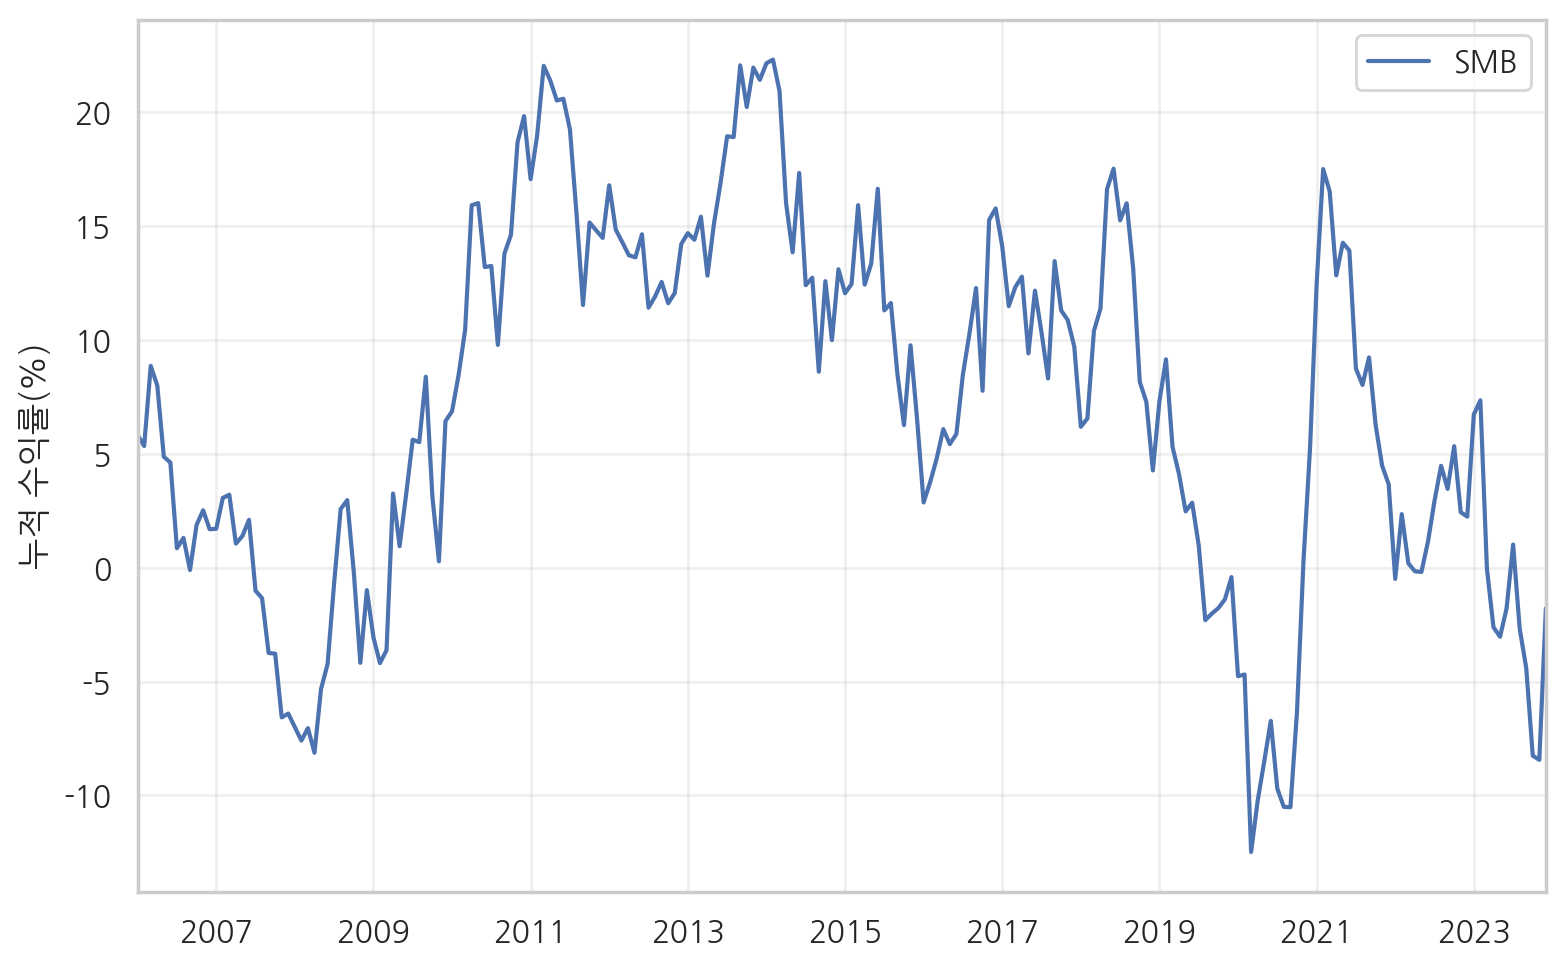

In [13]:
plt.figure()


factors_cum['SMB'].plot()


plt.xlabel('')
plt.ylabel('누적 수익률(%)')
plt.legend()

save_fig('SMB_ts')

plt.show()

- 2000년 중반 이후 SMB는 (+)의 평균 수익률을 올리고 있다고 보기 힘듬.

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/factors_ts.png


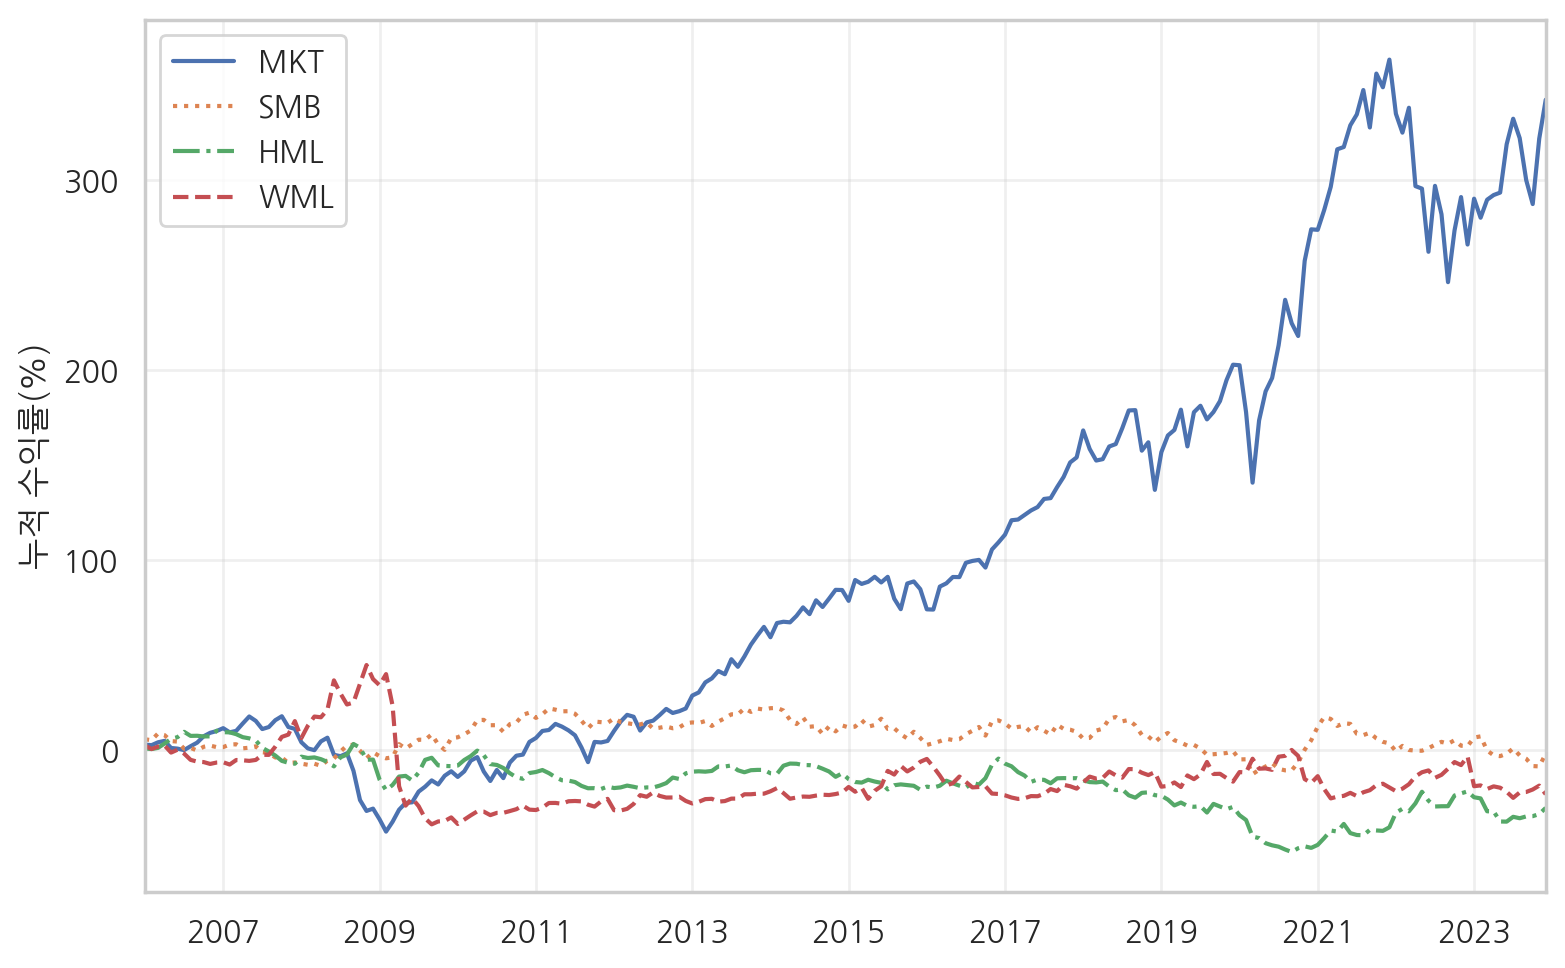

In [14]:
plt.figure()

factors_cum['Mkt-RF'].plot(label='MKT')
factors_cum['SMB'].plot(linestyle='dotted')
factors_cum['HML'].plot(linestyle='dashdot')
factors_cum['WML'].plot(linestyle='dashed')

plt.xlabel('')
plt.ylabel('누적 수익률(%)')
plt.legend()

save_fig('factors_ts')

plt.show()

- 모멘텀 요인(WML)을 보면 금융위기, 코비드19 시기 momentum crash가 발생하는 것을 볼 수 있음.

### 주요 factors들의 평균 수익률, 표준편차, 샤프 비율

In [15]:
def SR_table(df,start,end):
  '''
  df: 수익률 DataFrame
  start: starting date
  end: ending date
  output: 포트폴리오의 평균 수익률, 표준편차, 샤프비율을 보여주는 표
  '''
  df = df[start:end]
  avg_return = df.mean().to_frame()
  stds = df.std().to_frame()

  SR_table = pd.concat([avg_return,stds],axis=1)
  SR_table.columns = ['평균수익률','표준편차']
  SR_table['샤프비율'] = SR_table['평균수익률']/SR_table['표준편차']
  SR_table = SR_table.transpose()

  return SR_table

In [16]:
SR_table(factors,'1964','2023')

,Mkt-RF,SMB,HML,WML,RMW,CMA
평균수익률,0.798,0.026,-0.113,-0.007,0.360,0.078
표준편차,4.616,2.627,3.294,4.579,1.894,1.964
샤프비율,0.173,0.010,-0.034,-0.002,0.190,0.040


In [17]:
SR_table(factors,'2006','2015')

,Mkt-RF,SMB,HML,WML,RMW,CMA
평균수익률,0.613,0.080,-0.161,0.087,0.297,0.081
표준편차,4.455,2.369,2.550,4.972,1.581,1.313
샤프비율,0.138,0.034,-0.063,0.017,0.188,0.062


## CAPM으로 가치효과(value effect)를 설명할 수 있는가?

In [18]:
date_start = '1963-01'
date_end = '2006-12'

FF3 = web.DataReader('F-F_Research_Data_Factors','famafrench',start=date_start,end=date_end)[0]
BM = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench',start=date_start,end=date_end)[0]

In [19]:
FF3.head(3)

,Mkt-RF,SMB,HML,RF
Date,,,,
1963-01,4.940,3.010,2.240,0.250
1963-02,-2.400,0.460,2.150,0.230
1963-03,3.080,-2.580,2.100,0.230


In [20]:
BM.head(2)

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,...,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Date,,,,,,,,,,,
1963-01,-99.990,5.000,4.470,7.700,5.250,...,4.220,7.170,8.260,7.290,7.470
1963-02,-99.990,-2.790,-1.820,-0.810,-3.230,...,-1.430,-1.400,-1.540,-0.200,-0.580


In [21]:
BM = BM.iloc[:,-10:]
BM.head(2)

,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
Date,,,,,,,,,,
1963-01,4.440,6.480,4.220,4.480,3.570,4.220,7.170,8.260,7.290,7.470
1963-02,-3.560,-2.730,-1.350,-1.950,-2.260,-1.430,-1.400,-1.540,-0.200,-0.580


In [22]:
# (annualized) average returns formed on B/M
BMmean = BM.mean()*12

# get market return
FF3['r_m'] = FF3['Mkt-RF'] + FF3['RF']

In [23]:
# calculate betas for 10 pfs formed on B/M

BMbeta = []
var_rM = FF3['r_m'].var()

for col in BM.columns:
  covar = np.cov(BM[col],FF3['r_m'])[0,1]
  beta_estimate = covar/var_rM
  BMbeta.append(beta_estimate)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/value_effect.png


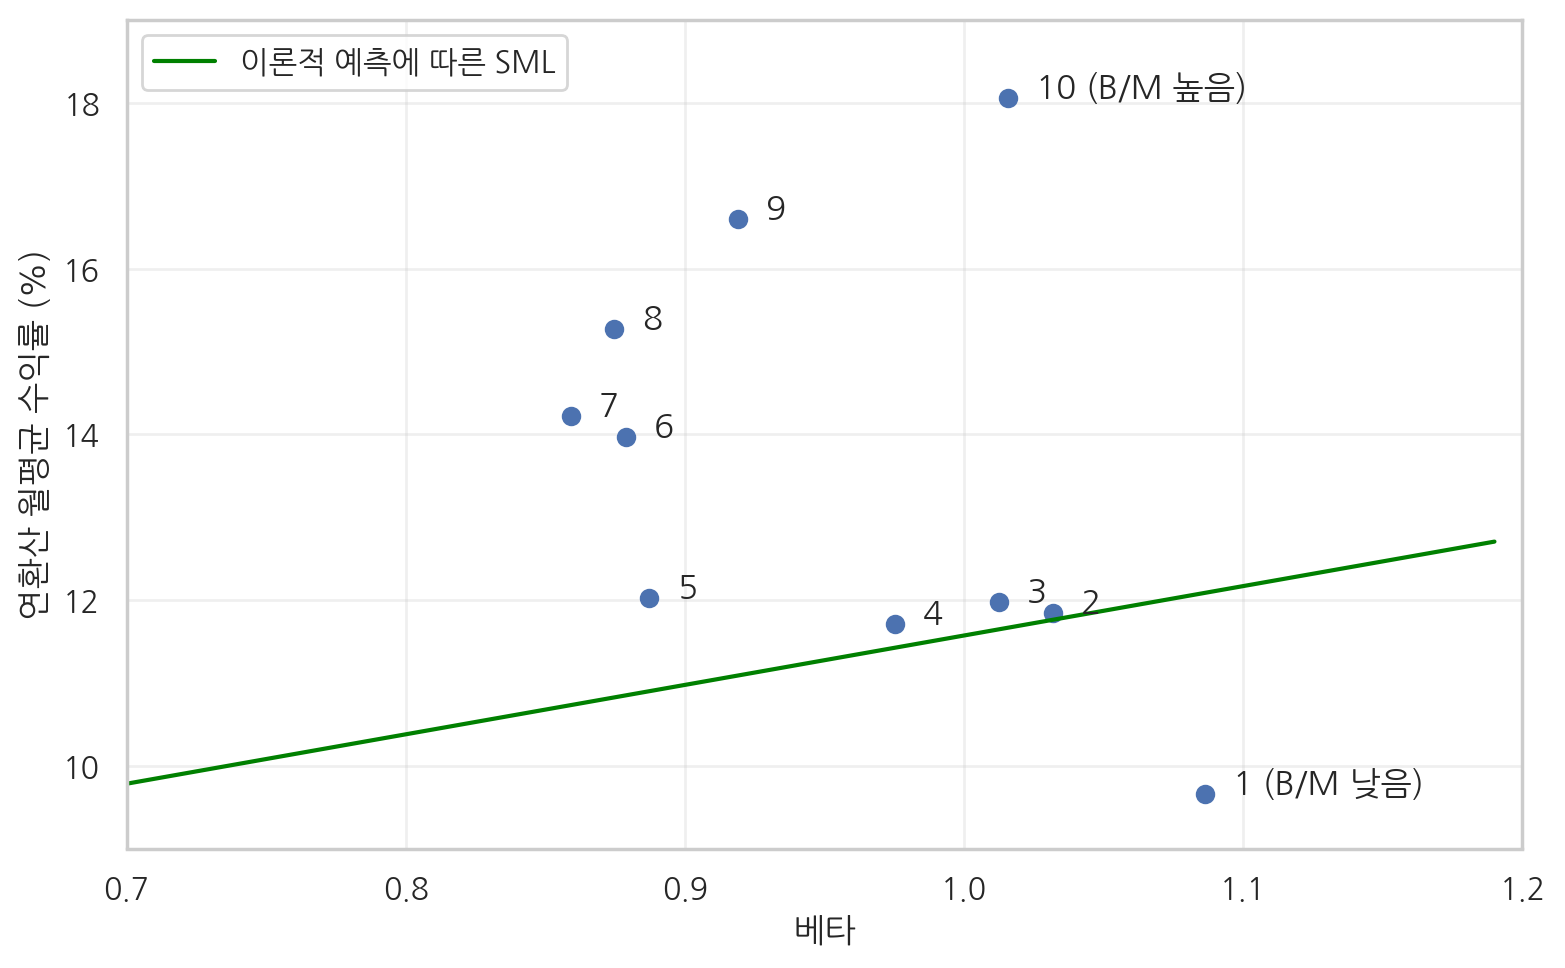

In [24]:
# for SML
x = np.arange(0,1.2,0.01)
y = FF3['RF'].mean()*12 + x*(FF3['Mkt-RF'].mean()*12)

plt.figure()
plt.scatter(BMbeta, BMmean)
plt.plot(x,y,color='green',label='이론적 예측에 따른 SML')
plt.xlabel('베타')
plt.ylabel('연환산 월평균 수익률 (%)')
plt.legend(loc='upper left')

plt.xlim([0.7,1.2])
plt.ylim([9,19])

anno_list = ['10 (B/M 높음)','9','8','7','6','5','4','3','2','1 (B/M 낮음)']

for i, code in enumerate(reversed(anno_list)):
    x = BMbeta[i]+0.01
    y = BMmean[i]
    plt.annotate(code, (x,y), size=12)

save_fig('value_effect')

## Fama and French (1996)의 주요 결과 replication

### FF 25 portfolios (formed on size and B/M)


In [25]:
# sample period
date_start = '1963-07'
date_end = '1993-12'
#date_start = '1931-01'
#date_end = '1999-12'

# FF25 pfs
ff25 = web.DataReader('25_Portfolios_5x5', 'famafrench',start=date_start,end=date_end)[0]

# FF 3-factor pfs: SML is different from the ones in FF 5-factor pfs
ff3 = web.DataReader('F-F_Research_Data_Factors', 'famafrench',start=date_start, end=date_end)[0]

## FF 5-factor pfs
ff5 = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench',start=date_start,end=date_end)[0]

In [26]:
print(ff25.head(2))
print(ff25.columns)

         SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ...  BIG LoBM  \
Date                                                        ...             
1963-07       1.129   -0.363    0.722   -0.041      -1.245  ...     0.139   
1963-08       4.240    1.373    1.492    2.507       4.664  ...     5.782   

         ME5 BM2  ME5 BM3  ME5 BM4  BIG HiBM  
Date                                          
1963-07    0.484    1.136   -0.428    -1.105  
1963-08    4.263    4.634    8.170     6.398  

[2 rows x 25 columns]
Index(['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1',
       'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2',
       'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3',
       'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4',
       'BIG HiBM'],
      dtype='object')


In [27]:
print(ff3.mean())
print('\n')
print(ff5.mean())

Mkt-RF   0.422
SMB      0.277
HML      0.453
RF       0.534
dtype: float64


Mkt-RF   0.422
SMB      0.317
HML      0.453
RMW      0.187
CMA      0.320
RF       0.534
dtype: float64


In [28]:
# get FF25 excess returns
ff25excess = ff25.subtract(ff3['RF'], axis=0)

# check return patterns
ff25excess.mean().values.reshape(5,5)

array([[0.281, 0.694, 0.774, 0.918, 1.089],
       [0.379, 0.667, 0.89 , 0.94 , 1.065],
       [0.436, 0.697, 0.724, 0.875, 1.001],
       [0.461, 0.428, 0.653, 0.816, 0.918],
       [0.323, 0.374, 0.373, 0.542, 0.624]])

### FF25의 평균 수익률과 베타 3D 그래프

average excess returns of FF25 formed on size and B/M
[[0.281 0.694 0.774 0.918 1.089]
 [0.379 0.667 0.89  0.94  1.065]
 [0.436 0.697 0.724 0.875 1.001]
 [0.461 0.428 0.653 0.816 0.918]
 [0.323 0.374 0.373 0.542 0.624]]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_returns.png


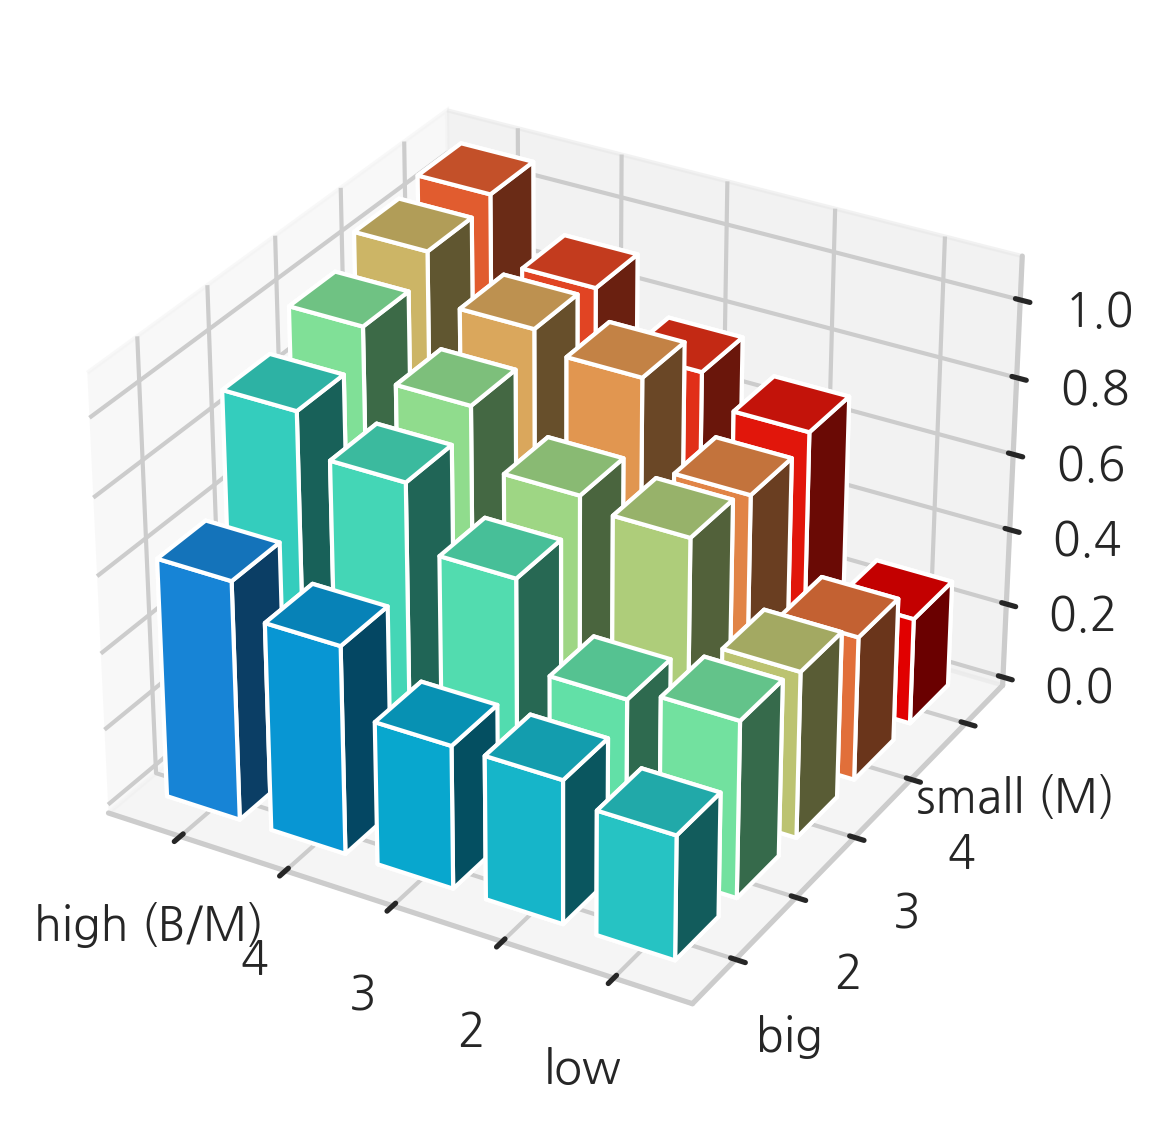

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Your data
result = ff25excess.mean().values.tolist()
result = np.reshape(result, (5, 5))
print('average excess returns of FF25 formed on size and B/M')
print(result)

# Reverse the order of rows and columns
result = result[::-1]
for i in range(5):
    result[i] = result[i][::-1]

fig = plt.figure(figsize=(5.5, 4.5), dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

xlabels = np.array(['high (B/M)', '4', '3', '2', 'low'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['big', '2', '3', '4', 'small (M)'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = result
zpos = zpos.ravel()

dx = 0.7
dy = 0.7
dz = zpos

ax1.xaxis.set_ticks(xpos + dx/2.)
ax1.xaxis.set_ticklabels(xlabels)

ax1.yaxis.set_ticks(ypos + dy/2.)
ax1.yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)

# Plot the 3D bar graph
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz * 0, dx, dy, dz, color=colors)

save_fig('FF25_returns')

plt.show()


In [30]:
import statsmodels.api as sm

x = ff3['Mkt-RF']
x_cons = sm.add_constant(x)

beta_storage = []

for col in ff25.columns:
    y = ff25excess[col]
    model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
    results = model.fit()
    beta_estimate = results.params[1]
    beta_storage.append(beta_estimate)

estimated betas of FF25 portfolios:
[[1.418 1.244 1.153 1.071 1.099]
 [1.427 1.233 1.111 1.03  1.127]
 [1.353 1.159 1.034 0.971 1.068]
 [1.222 1.123 1.04  0.97  1.078]
 [1.005 0.983 0.867 0.84  0.868]]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_betas.png


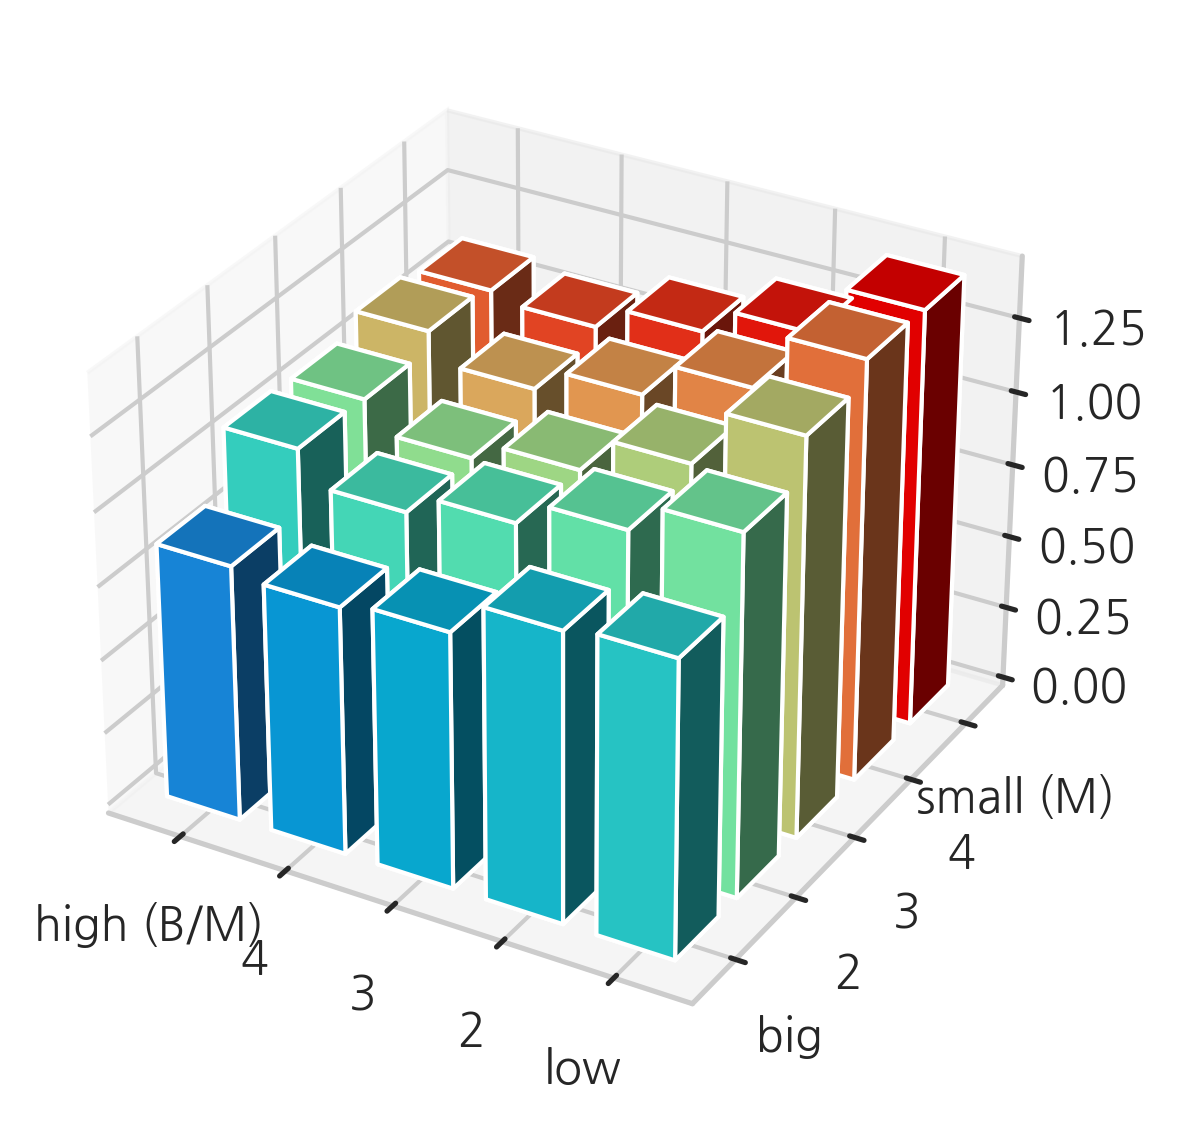

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Reshape the data
result = np.reshape(beta_storage, (5, 5))
print('estimated betas of FF25 portfolios:')
print(result)

# Reverse rows and columns
result = result[::-1]
for i in range(5):
    result[i] = result[i][::-1]

# Create a 3D plot
fig = plt.figure(figsize=(5.5, 4.5), dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

# Set labels and positions
xlabels = np.array(['high (B/M)', '4', '3', '2', 'low'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['big', '2', '3', '4', 'small (M)'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = result.ravel()

dx = dy = 0.7
dz = zpos

# Set ticks and tick labels
ax1.xaxis.set_ticks(xpos + dx/2.)
ax1.xaxis.set_ticklabels(xlabels)

ax1.yaxis.set_ticks(ypos + dy/2.)
ax1.yaxis.set_ticklabels(ylabels)

# Create a colormap
values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)

# Plot the 3D bar graph
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)

save_fig('FF25_betas')
plt.show()


### Table 1: Regress 3 factors on FF25

- Fama and French (1996)의 Table 1 replication

In [32]:
# FF 3 factors
x = ff3[['Mkt-RF','SMB','HML']]
x_cons = sm.add_constant(x)

est_storage = []
t_storage = []
R2_storage = []

for col in ff25.columns:
    y = ff25excess[col]
    model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
    results = model.fit()
    est_storage.append(results.params)
    t_storage.append(results.tvalues)
    R2_storage.append(results.rsquared)

est_storage = np.array(est_storage)
t_storage = np.array(t_storage)
R2_storage = np.array(R2_storage)

In [33]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

var_list = ['alpha (intercept)','beta','s','h']

n = len(est_storage[0])
for i in range(n):
  print(f'*** estimates of {var_list[i]} ***')
  print(est_storage[:,i].reshape(5,5))
  print(f'*** t-values  of {var_list[i]} estimates ***')
  print(t_storage[:,i].reshape(5,5))
  print('\n')

print('*** R2 ***')
print(R2_storage.reshape(5,5))

*** estimates of alpha (intercept) ***
[[-0.42 -0.12 -0.06 0.05 0.07]
 [-0.15 -0.03 0.14 0.13 0.07]
 [-0.02 0.07 0.02 0.12 0.06]
 [0.13 -0.12 0.01 0.08 0.00]
 [0.18 -0.00 -0.06 -0.07 -0.16]]
*** t-values  of alpha (intercept) estimates ***
[[-4.09 -1.48 -0.95 0.91 1.05]
 [-1.89 -0.50 2.27 2.08 1.00]
 [-0.27 0.93 0.31 1.85 0.70]
 [1.83 -1.50 0.07 0.94 0.04]
 [2.70 -0.05 -0.68 -1.03 -1.51]]


*** estimates of beta ***
[[1.03 0.97 0.94 0.89 0.95]
 [1.10 1.02 0.96 0.96 1.07]
 [1.10 1.02 0.97 0.97 1.06]
 [1.06 1.07 1.05 1.03 1.15]
 [0.96 1.03 0.97 1.00 1.04]]
*** t-values  of beta estimates ***
[[40.09 49.80 58.93 60.64 58.67]
 [54.75 61.79 61.03 64.26 66.66]
 [60.21 57.89 56.44 60.69 51.98]
 [58.34 53.49 54.52 51.94 47.82]
 [58.42 58.98 45.26 56.12 38.97]]


*** estimates of s ***
[[1.44 1.29 1.15 1.11 1.20]
 [1.01 0.93 0.84 0.70 0.85]
 [0.70 0.63 0.54 0.44 0.64]
 [0.30 0.27 0.22 0.22 0.35]
 [-0.19 -0.20 -0.27 -0.20 -0.04]]
*** t-values  of s estimates ***
[[38.00 45.12 48.97 51.29 50.36]


### How can FF3 model explain pfs formed on other variables?

In [34]:
search_data = [dataset for dataset in datasets if 'E-P' in dataset]
print(search_data)
search_data = [dataset for dataset in datasets if 'CF-P' in dataset]
print(search_data)
search_data = [dataset for dataset in datasets if 'Momentum' in dataset]
print(search_data)
search_data = [dataset for dataset in datasets if 'Reversal' in dataset]
print(search_data)

['Portfolios_Formed_on_E-P', 'Portfolios_Formed_on_E-P_Wout_Div', 'E-P_Breakpoints']
['Portfolios_Formed_on_CF-P', 'Portfolios_Formed_on_CF-P_Wout_Div', 'CF-P_Breakpoints']
['F-F_Momentum_Factor', 'F-F_Momentum_Factor_daily']
['F-F_ST_Reversal_Factor', 'F-F_ST_Reversal_Factor_daily', 'F-F_LT_Reversal_Factor', 'F-F_LT_Reversal_Factor_daily']


In [35]:
# pfs formed on E/P, CF/P
EP = web.DataReader('Portfolios_Formed_on_E-P', 'famafrench',start=date_start,end=date_end)[0]
CP = web.DataReader('Portfolios_Formed_on_CF-P', 'famafrench',start=date_start,end=date_end)[0]
momentum = web.DataReader('10_Portfolios_Prior_1_0', 'famafrench',start=date_start,end=date_end)[0]
reversal = web.DataReader('10_Portfolios_Prior_60_13', 'famafrench',start=date_start,end=date_end)[0]

### 10 pfs formed on PER, C/P, momentum, reversal

Things to check:
- patterns of average returns of 10 pfs formed on C/P
- Can beta explain the pattern?
- What explains the pattern?

In [36]:
# function that fit FF3 factors
def FF3GRS(ExcessRs, FF3, fig_name):
  '''
  function to
  (1) fit FF3 factors to get the estimates of factor loadings
  (2) plot them

  INPUT
  - ExcessRs: portfolio returns sorted on some variable
  - FF3: Fama-French 3 factors
  - fig_name: name used for figure name

  OUTPUT
  - factor loadings on FF3 factors
  - graph on factor loadings with average returns and alpha
  '''
  est_storage = []
  t_storage = []
  R2_storage = []

  x_cons = sm.add_constant(FF3)

  for col in ExcessRs.columns:
      y = ExcessRs[col]
      model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
      results = model.fit()
      est_storage.append(results.params)
      t_storage.append(results.tvalues)
      R2_storage.append(results.rsquared)

  est_storage = np.array(est_storage)
  t_storage = np.array(t_storage)
  R2_storage = np.array(R2_storage)

  # for better regression output display
  float_formatter = "{:.2f}".format
  np.set_printoptions(formatter={'float_kind':float_formatter})

  var_list = ['alpha (intercept)','beta','s','h']

  n = len(est_storage[0])

  for i in range(n):
    print(f'*** estimates of {var_list[i]} ***')
    print(est_storage[:,i])
    print(f'*** t-values  of {var_list[i]} estimates ***')
    print(t_storage[:,i])
    print('\n')

  print('*** R2 ***')
  print(R2_storage)

  # for graphical display
  xticks = ['Lo','2','3','4','5','6','7','8','9','High']

  fig, ax = plt.subplots(5,1,sharex=True, sharey=False, figsize=(7,5))

  ax[0].bar(xticks, ExcessRs.mean())
  ax[0].set_xlabel('평균 수익률')
  #ax[0].set_title('평균 수익률')

  ax[1].bar(xticks,est_storage[:,0])
  ax[1].set_xlabel(r'$\hat{\alpha}$')
  #ax[1].set_title(r'$\hat{\alpha}$')

  ax[2].bar(xticks,est_storage[:,1])
  ax[2].set_xlabel(r'$\hat{b}$')
  #ax[2].set_title(r'$\hat{b}$')

  ax[3].bar(xticks,est_storage[:,2])
  ax[3].set_xlabel(r'$\hat{s}$')
  #ax[3].set_title(r'$\hat{s}$')

  ax[4].bar(xticks,est_storage[:,3])
  ax[4].set_xlabel(r'$\hat{h}$')
  #ax[4].set_title(r'$\hat{h}$')

  fig.tight_layout(pad=0.1)
  figure_name = 'FF25_' + fig_name
  save_fig(figure_name)

  plt.show()

  return est_storage, t_storage, R2_storage

In [37]:
# 10 pfs formed on momentum, reversal, C/P, E/P in terms of excess returns
momentum10 = momentum
reversal10 = reversal
CP10 = CP.iloc[:,9:].subtract(ff3['RF'], axis=0)
EP10 = EP.iloc[:,9:].subtract(ff3['RF'], axis=0)

# FF 3 factors
x = ff3[['Mkt-RF','SMB','HML']]

*** estimates of alpha (intercept) ***
[0.17 0.04 0.07 -0.03 -0.06 0.03 0.06 0.03 0.04 -0.11]
*** t-values  of alpha (intercept) estimates ***
[1.83 0.60 0.93 -0.34 -0.78 0.42 0.85 0.42 0.46 -1.20]


*** estimates of beta ***
[1.00 0.99 1.02 0.96 1.00 1.01 0.99 1.00 1.03 1.09]
*** t-values  of beta estimates ***
[44.08 63.96 56.95 49.58 53.35 52.71 52.67 48.19 45.77 49.45]


*** estimates of s ***
[0.02 -0.05 -0.05 -0.06 -0.02 0.03 0.02 0.07 0.15 0.39]
*** t-values  of s estimates ***
[0.59 -2.34 -1.84 -2.06 -0.78 0.97 0.64 2.17 4.45 12.22]


*** estimates of h ***
[-0.63 -0.36 -0.11 -0.01 0.07 0.24 0.34 0.46 0.56 0.68]
*** t-values  of h estimates ***
[-17.03 -14.38 -3.87 -0.43 2.45 7.86 11.00 13.61 15.35 19.05]


*** R2 ***
[0.91 0.95 0.92 0.90 0.91 0.90 0.90 0.88 0.88 0.90]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_PER.png


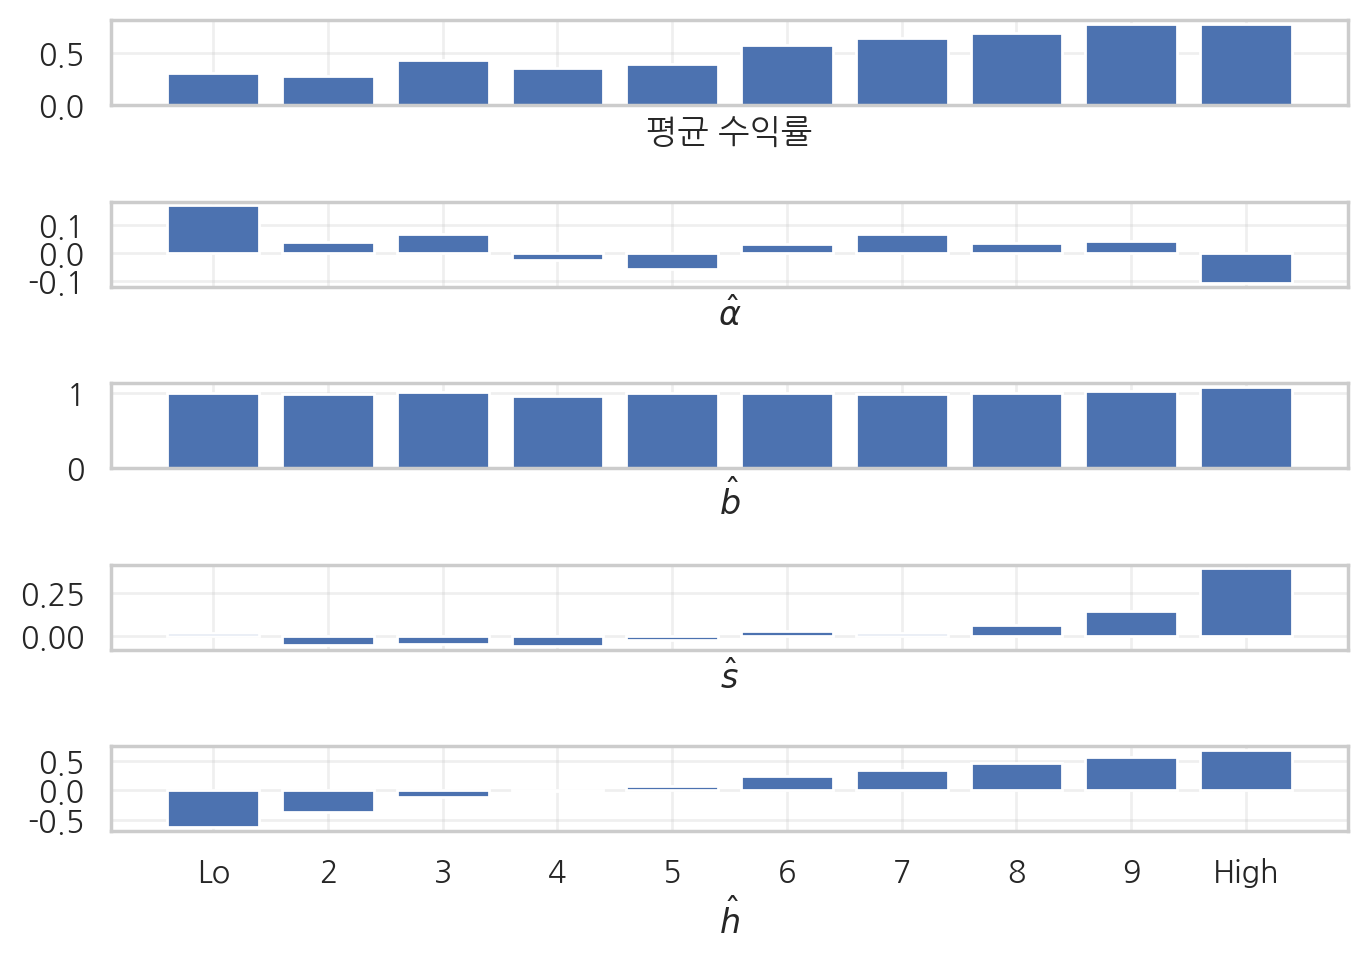

(array([[0.17, 1.00, 0.02, -0.63],
        [0.04, 0.99, -0.05, -0.36],
        [0.07, 1.02, -0.05, -0.11],
        [-0.03, 0.96, -0.06, -0.01],
        [-0.06, 1.00, -0.02, 0.07],
        [0.03, 1.01, 0.03, 0.24],
        [0.06, 0.99, 0.02, 0.34],
        [0.03, 1.00, 0.07, 0.46],
        [0.04, 1.03, 0.15, 0.56],
        [-0.11, 1.09, 0.39, 0.68]]),
 array([[1.83, 44.08, 0.59, -17.03],
        [0.60, 63.96, -2.34, -14.38],
        [0.93, 56.95, -1.84, -3.87],
        [-0.34, 49.58, -2.06, -0.43],
        [-0.78, 53.35, -0.78, 2.45],
        [0.42, 52.71, 0.97, 7.86],
        [0.85, 52.67, 0.64, 11.00],
        [0.42, 48.19, 2.17, 13.61],
        [0.46, 45.77, 4.45, 15.35],
        [-1.20, 49.45, 12.22, 19.05]]),
 array([0.91, 0.95, 0.92, 0.90, 0.91, 0.90, 0.90, 0.88, 0.88, 0.90]))

In [38]:
FF3GRS(EP10,x,'PER')

*** estimates of alpha (intercept) ***
[0.17 0.06 0.04 -0.03 0.02 -0.04 -0.04 -0.02 0.12 -0.02]
*** t-values  of alpha (intercept) estimates ***
[2.09 0.80 0.52 -0.42 0.27 -0.51 -0.55 -0.19 1.49 -0.16]


*** estimates of beta ***
[1.01 1.00 0.99 1.01 0.98 1.01 0.99 1.00 1.00 1.09]
*** t-values  of beta estimates ***
[50.61 58.19 54.49 56.98 48.41 50.88 51.29 46.35 49.81 46.50]


*** estimates of s ***
[0.01 -0.08 0.00 0.00 0.08 -0.08 0.04 -0.01 0.05 0.29]
*** t-values  of s estimates ***
[0.33 -3.10 0.12 0.12 2.54 -2.86 1.29 -0.23 1.62 8.44]


*** estimates of h ***
[-0.62 -0.34 -0.13 -0.01 0.13 0.11 0.28 0.38 0.61 0.68]
*** t-values  of h estimates ***
[-19.16 -12.23 -4.42 -0.24 4.05 3.54 9.07 10.73 18.67 17.94]


*** R2 ***
[0.93 0.93 0.92 0.92 0.89 0.90 0.90 0.87 0.89 0.89]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_PCF.png


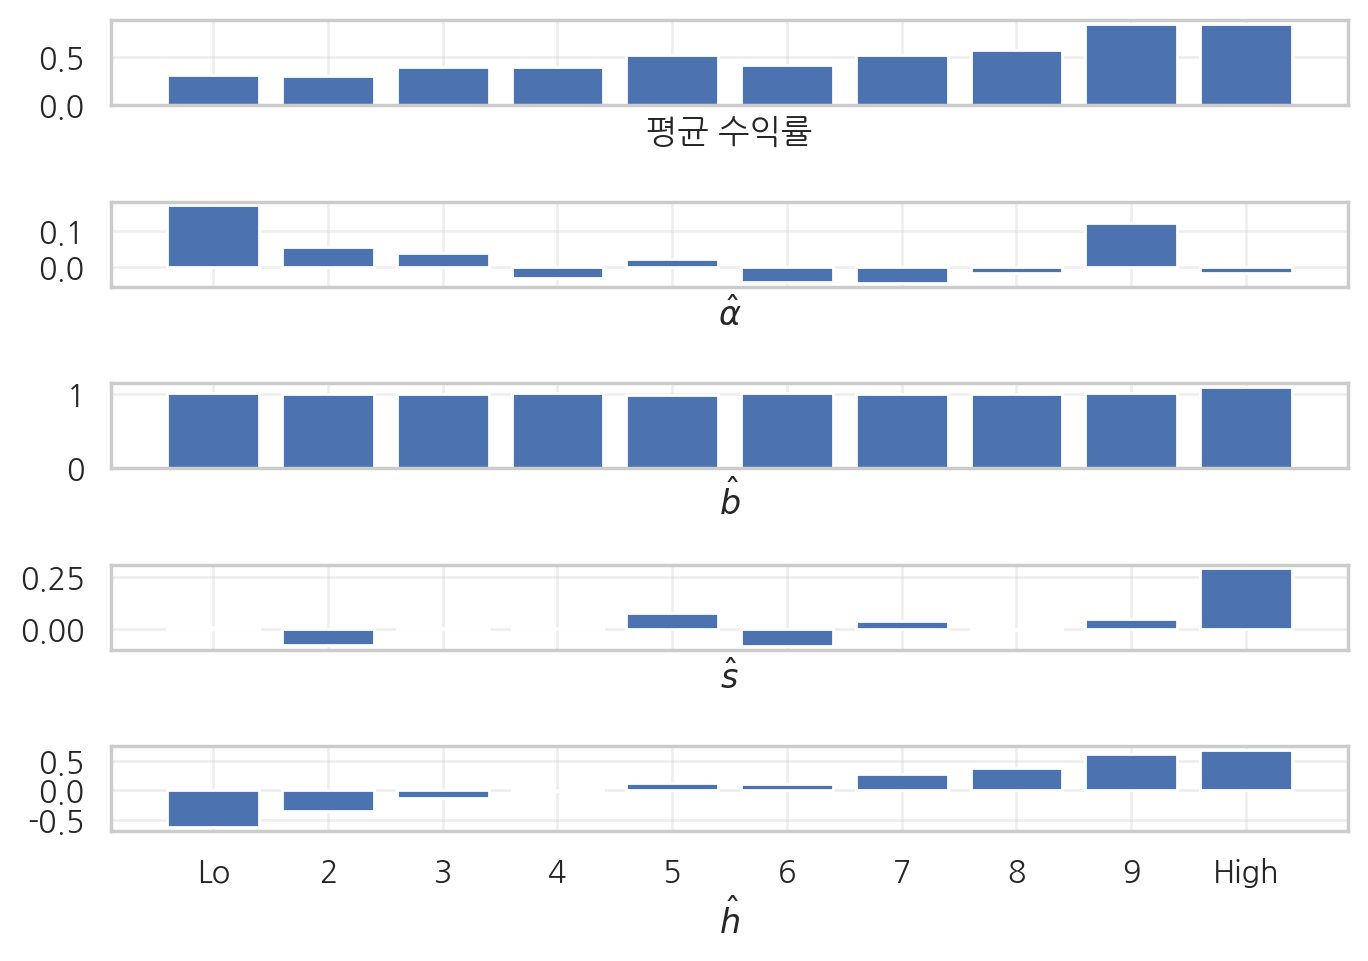

(array([[0.17, 1.01, 0.01, -0.62],
        [0.06, 1.00, -0.08, -0.34],
        [0.04, 0.99, 0.00, -0.13],
        [-0.03, 1.01, 0.00, -0.01],
        [0.02, 0.98, 0.08, 0.13],
        [-0.04, 1.01, -0.08, 0.11],
        [-0.04, 0.99, 0.04, 0.28],
        [-0.02, 1.00, -0.01, 0.38],
        [0.12, 1.00, 0.05, 0.61],
        [-0.02, 1.09, 0.29, 0.68]]),
 array([[2.09, 50.61, 0.33, -19.16],
        [0.80, 58.19, -3.10, -12.23],
        [0.52, 54.49, 0.12, -4.42],
        [-0.42, 56.98, 0.12, -0.24],
        [0.27, 48.41, 2.54, 4.05],
        [-0.51, 50.88, -2.86, 3.54],
        [-0.55, 51.29, 1.29, 9.07],
        [-0.19, 46.35, -0.23, 10.73],
        [1.49, 49.81, 1.62, 18.67],
        [-0.16, 46.50, 8.44, 17.94]]),
 array([0.93, 0.93, 0.92, 0.92, 0.89, 0.90, 0.90, 0.87, 0.89, 0.89]))

In [39]:
FF3GRS(CP10,x,'PCF')

*** estimates of alpha (intercept) ***
[0.34 0.45 0.50 0.55 0.59 0.56 0.63 0.64 0.49 0.50]
*** t-values  of alpha (intercept) estimates ***
[2.15 3.81 4.77 6.55 7.98 7.35 7.46 7.96 6.35 5.69]


*** estimates of beta ***
[1.12 1.06 1.03 1.02 0.99 0.99 1.00 0.97 1.01 1.12]
*** t-values  of beta estimates ***
[28.35 36.27 39.56 49.04 54.36 51.90 48.04 48.67 53.00 51.72]


*** estimates of s ***
[0.77 0.29 0.12 0.08 -0.03 -0.08 -0.12 -0.08 -0.04 0.09]
*** t-values  of s estimates ***
[13.28 6.66 3.06 2.61 -1.06 -2.93 -3.92 -2.85 -1.53 2.72]


*** estimates of h ***
[0.65 0.41 0.37 0.32 0.21 0.15 0.01 -0.07 -0.22 -0.50]
*** t-values  of h estimates ***
[10.07 8.66 8.84 9.50 7.16 4.95 0.41 -2.25 -7.03 -14.27]


*** R2 ***
[0.80 0.83 0.84 0.89 0.91 0.90 0.89 0.89 0.92 0.93]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_reversal.png


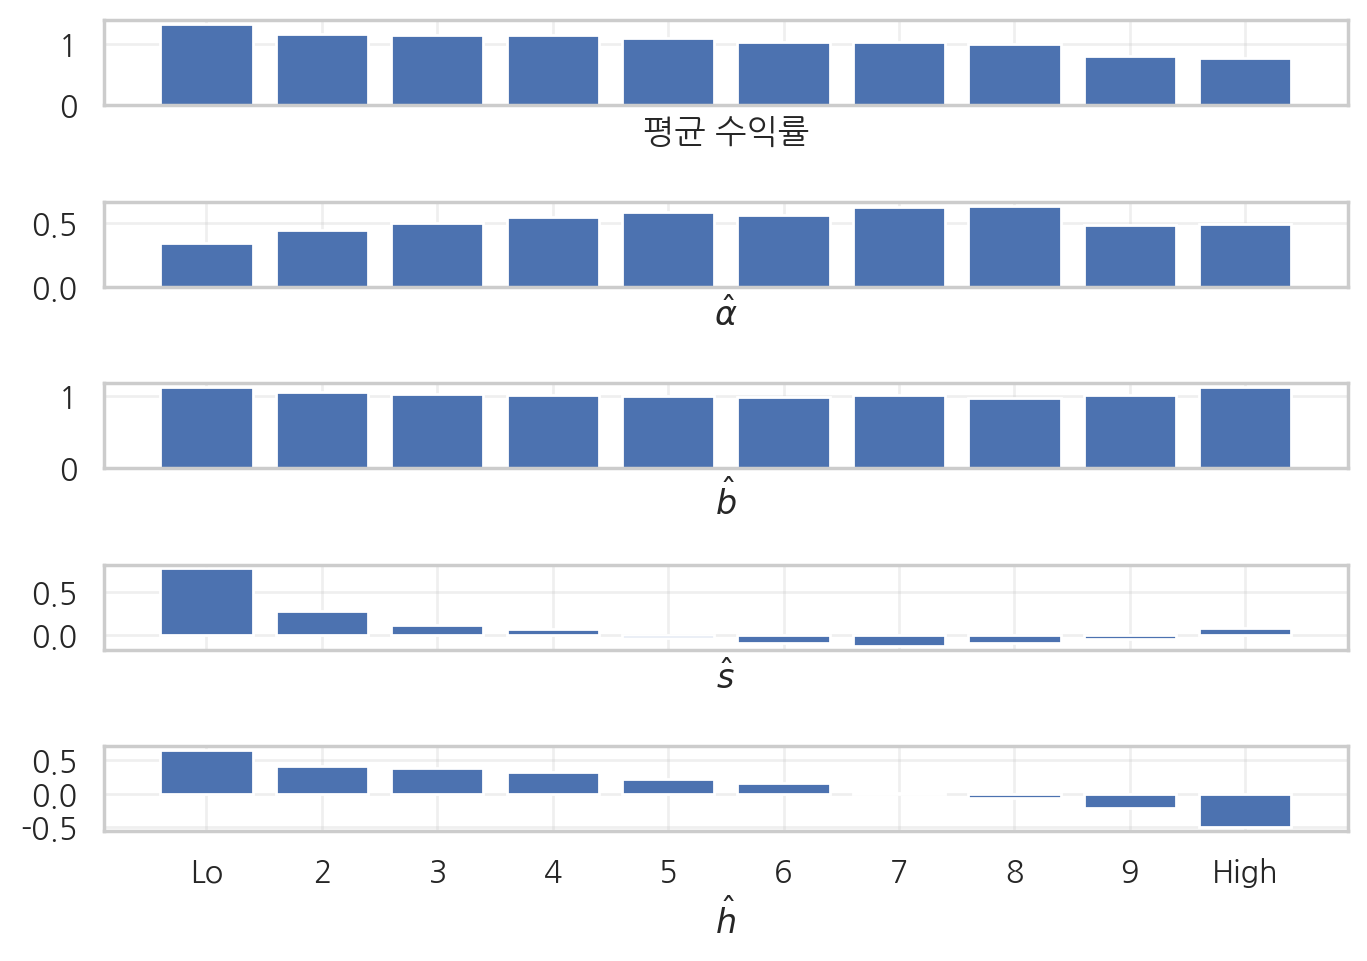

(array([[0.34, 1.12, 0.77, 0.65],
        [0.45, 1.06, 0.29, 0.41],
        [0.50, 1.03, 0.12, 0.37],
        [0.55, 1.02, 0.08, 0.32],
        [0.59, 0.99, -0.03, 0.21],
        [0.56, 0.99, -0.08, 0.15],
        [0.63, 1.00, -0.12, 0.01],
        [0.64, 0.97, -0.08, -0.07],
        [0.49, 1.01, -0.04, -0.22],
        [0.50, 1.12, 0.09, -0.50]]),
 array([[2.15, 28.35, 13.28, 10.07],
        [3.81, 36.27, 6.66, 8.66],
        [4.77, 39.56, 3.06, 8.84],
        [6.55, 49.04, 2.61, 9.50],
        [7.98, 54.36, -1.06, 7.16],
        [7.35, 51.90, -2.93, 4.95],
        [7.46, 48.04, -3.92, 0.41],
        [7.96, 48.67, -2.85, -2.25],
        [6.35, 53.00, -1.53, -7.03],
        [5.69, 51.72, 2.72, -14.27]]),
 array([0.80, 0.83, 0.84, 0.89, 0.91, 0.90, 0.89, 0.89, 0.92, 0.93]))

In [40]:
FF3GRS(reversal,x,'reversal')

*** estimates of alpha (intercept) ***
[0.59 0.67 0.73 0.45 0.53 0.58 0.46 0.60 0.44 0.27]
*** t-values  of alpha (intercept) estimates ***
[4.34 6.10 7.74 5.97 7.73 8.79 7.02 7.96 4.87 2.23]


*** estimates of beta ***
[1.17 1.10 1.04 1.00 1.01 0.97 0.96 0.93 0.98 0.95]
*** t-values  of beta estimates ***
[34.78 40.38 44.10 53.81 59.38 59.50 58.41 49.60 43.71 31.89]


*** estimates of s ***
[0.56 0.23 0.11 0.04 -0.03 -0.06 -0.08 -0.04 0.02 0.27]
*** t-values  of s estimates ***
[11.25 5.60 3.28 1.51 -1.38 -2.47 -3.26 -1.29 0.63 6.12]


*** estimates of h ***
[-0.06 0.04 0.03 0.12 0.07 0.03 0.07 0.01 -0.04 -0.04]
*** t-values  of h estimates ***
[-1.04 0.80 0.88 3.99 2.51 0.97 2.54 0.36 -1.04 -0.91]


*** R2 ***
[0.85 0.87 0.88 0.91 0.92 0.92 0.92 0.90 0.88 0.81]
Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/FF25_momentum.png


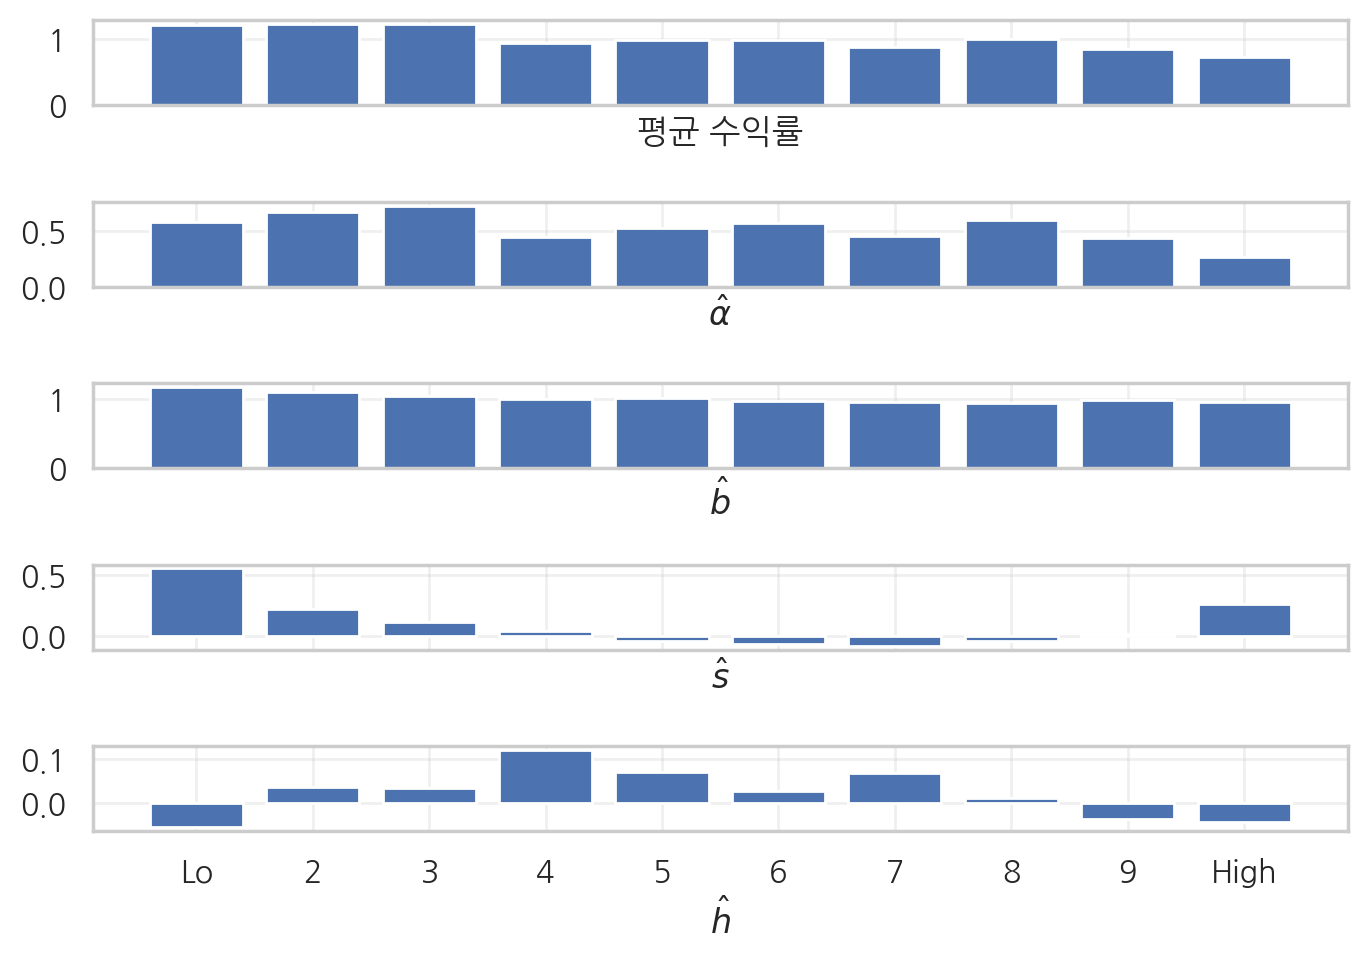

(array([[0.59, 1.17, 0.56, -0.06],
        [0.67, 1.10, 0.23, 0.04],
        [0.73, 1.04, 0.11, 0.03],
        [0.45, 1.00, 0.04, 0.12],
        [0.53, 1.01, -0.03, 0.07],
        [0.58, 0.97, -0.06, 0.03],
        [0.46, 0.96, -0.08, 0.07],
        [0.60, 0.93, -0.04, 0.01],
        [0.44, 0.98, 0.02, -0.04],
        [0.27, 0.95, 0.27, -0.04]]),
 array([[4.34, 34.78, 11.25, -1.04],
        [6.10, 40.38, 5.60, 0.80],
        [7.74, 44.10, 3.28, 0.88],
        [5.97, 53.81, 1.51, 3.99],
        [7.73, 59.38, -1.38, 2.51],
        [8.79, 59.50, -2.47, 0.97],
        [7.02, 58.41, -3.26, 2.54],
        [7.96, 49.60, -1.29, 0.36],
        [4.87, 43.71, 0.63, -1.04],
        [2.23, 31.89, 6.12, -0.91]]),
 array([0.85, 0.87, 0.88, 0.91, 0.92, 0.92, 0.92, 0.90, 0.88, 0.81]))

In [41]:
FF3GRS(momentum,x,'momentum')

## 연습문제: 펀드 평가(Fund Evaluation)

In [43]:
# import Excel file
filelink = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/fund_evaluation.xlsx'
df = pd.read_excel(filelink)
df.set_index('mdate',inplace=True)

# portfolio excess returns
pf_excess = df.iloc[:,0:9]
pf_excess = pf_excess.subtract(df['rf'],axis=0)

# factors
factors = df.loc[:,['MktRF','SMB','HML','WML']]

In [44]:
pf_excess.tail(2)

,아귀,짝귀가치주펀드,철용대기업펀드,호구2호성장형,광렬,정마담성장주펀드,고니1호,평경장,고니삼촌
mdate,,,,,,,,,
2023-11-01,NaN,4.985,5.891,7.266,-6.871,2.895,5.550,5.524,2.811
2023-12-01,NaN,2.062,1.280,2.135,2.004,1.657,8.293,5.651,0.939


In [45]:
factors.head(2)

,MktRF,SMB,HML,WML
mdate,,,,
2002-01-01,-3.990,5.100,4.090,3.830
2002-02-01,-1.930,0.930,0.970,0.360


### CAPM으로 평가

In [46]:
  est_storage = []
  t_storage = []
  R2_storage = []
  N_storage = []

  x_cons = sm.add_constant(factors['MktRF'])

  for col in pf_excess.columns:
      y = pf_excess[col]
      model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
      results = model.fit()
      est_storage.append(results.params)
      t_storage.append(results.tvalues)
      R2_storage.append(results.rsquared)
      N_storage.append(results.nobs)

In [47]:
est_storage = pd.DataFrame(est_storage)
t_storage = pd.DataFrame(t_storage)
R2_storage = pd.DataFrame(R2_storage)
N_storage = pd.DataFrame(N_storage)

result_CAPM = pd.concat([est_storage,t_storage,R2_storage,N_storage],axis=1).T
result_CAPM.columns = pf_excess.columns
result_CAPM.index = ['alpha','b','t(alpha)','t(b)','R2','N']

print('********** CAPM으로 평가한 알파 **********')
result_CAPM

********** CAPM으로 평가한 알파 **********


,아귀,짝귀가치주펀드,철용대기업펀드,호구2호성장형,광렬,정마담성장주펀드,고니1호,평경장,고니삼촌
alpha,-0.509,-0.195,-0.200,-0.210,-0.227,0.099,0.004,0.364,-0.045
b,0.662,0.894,1.008,1.003,1.070,0.877,1.202,0.915,0.928
t(alpha),-1.505,-0.693,-1.022,-1.123,-0.688,1.214,0.024,3.729,-0.358
t(b),6.244,12.654,20.414,23.659,12.807,48.268,34.265,41.910,32.881
R2,0.419,0.705,0.860,0.735,0.580,0.901,0.861,0.919,0.820
N,56.000,69.000,70.000,204.000,121.000,257.000,191.000,156.000,240.000


### Fama-French 3요인 모형으로 평가

In [48]:
est_storage = []
t_storage = []
R2_storage = []
N_storage = []

x_cons = sm.add_constant(factors[['MktRF','SMB','HML']])

for col in pf_excess.columns:
     y = pf_excess[col]
     model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
     results = model.fit()
     est_storage.append(results.params)
     t_storage.append(results.tvalues)
     R2_storage.append(results.rsquared)
     N_storage.append(results.nobs)

In [49]:
est_storage = pd.DataFrame(est_storage)
t_storage = pd.DataFrame(t_storage)
R2_storage = pd.DataFrame(R2_storage)
N_storage = pd.DataFrame(N_storage)

result_FF3 = pd.concat([est_storage,t_storage,R2_storage,N_storage],axis=1).T
result_FF3.columns = pf_excess.columns
result_FF3.index = ['alpha','b','s','h','t(alpha)','t(b)','t(s)','t(h)','R2','N']

print('********** FF3으로 평가한 알파 **********')
result_FF3

********** FF3으로 평가한 알파 **********


,아귀,짝귀가치주펀드,철용대기업펀드,호구2호성장형,광렬,정마담성장주펀드,고니1호,평경장,고니삼촌
alpha,-0.752,0.028,-0.362,-0.043,-0.062,-0.066,0.350,0.301,-0.145
b,0.796,0.965,1.168,0.953,1.058,0.968,1.038,0.960,0.966
s,0.020,0.865,0.180,1.019,0.625,0.070,0.235,0.023,0.311
h,0.389,0.444,0.458,0.171,0.160,0.324,-0.444,0.165,0.248
t(alpha),-2.185,0.301,-2.134,-0.616,-0.203,-0.949,2.753,3.117,-1.244
t(b),6.623,34.017,22.614,52.492,12.140,53.482,31.412,39.357,32.200
t(s),0.146,24.330,2.773,36.513,5.486,2.599,4.674,0.623,6.742
t(h),2.190,9.757,5.547,5.441,1.181,10.598,-7.876,3.729,4.944
R2,0.476,0.971,0.905,0.966,0.666,0.932,0.911,0.926,0.857
N,56.000,69.000,70.000,204.000,121.000,257.000,191.000,156.000,240.000


### 4요인(FF3 + 모멘텀)으로 평가

In [50]:
est_storage = []
t_storage = []
R2_storage = []
N_storage = []

x_cons = sm.add_constant(factors[['MktRF','SMB','HML','WML']])

for col in pf_excess.columns:
     y = pf_excess[col]
     model = sm.OLS(y,x_cons, missing='drop') # option: drop missing ones
     results = model.fit()
     est_storage.append(results.params)
     t_storage.append(results.tvalues)
     R2_storage.append(results.rsquared)
     N_storage.append(results.nobs)

In [51]:
est_storage = pd.DataFrame(est_storage)
t_storage = pd.DataFrame(t_storage)
R2_storage = pd.DataFrame(R2_storage)
N_storage = pd.DataFrame(N_storage)

result_FF4 = pd.concat([est_storage,t_storage,R2_storage,N_storage],axis=1).T
result_FF4.columns = pf_excess.columns
result_FF4.index = ['alpha','b','s','h','m','t(alpha)','t(b)','t(s)','t(h)','t(m)','R2','N']

print('********** 4요인(FF3 + 모멘텀)으로 평가한 알파 **********')
result_FF4

********** 4요인(FF3 + 모멘텀)으로 평가한 알파 **********


,아귀,짝귀가치주펀드,철용대기업펀드,호구2호성장형,광렬,정마담성장주펀드,고니1호,평경장,고니삼촌
alpha,-0.676,0.145,-0.158,-0.008,0.037,-0.004,0.284,0.278,-0.074
b,0.824,0.971,1.182,0.954,1.059,0.974,1.033,0.957,0.971
s,0.003,0.831,0.126,1.012,0.595,0.064,0.257,0.031,0.298
h,0.411,0.436,0.451,0.167,0.148,0.309,-0.431,0.169,0.230
m,-0.156,-0.149,-0.251,-0.041,-0.096,-0.068,0.090,0.030,-0.076
t(alpha),-1.927,1.753,-1.018,-0.111,0.114,-0.051,2.185,2.779,-0.610
t(b),6.715,40.181,26.055,52.777,12.136,54.439,31.449,38.952,32.504
t(s),0.024,26.844,2.178,36.009,4.985,2.425,5.053,0.805,6.453
t(h),2.302,11.266,6.239,5.289,1.081,10.189,-7.669,3.806,4.540
t(m),-1.085,-5.070,-4.574,-1.730,-0.866,-3.191,2.098,0.886,-2.132


### 펀드 평가: 알파 순서로 정렬

In [52]:
print('***** CAPM으로 평가한 순위 *****')
print(result_CAPM.sort_values(by='alpha',axis=1,ascending=False))
print('\n')
print('***** 3요인으로 평가한 순위 *****')
print(result_FF3.sort_values(by='alpha',axis=1,ascending=False))
print('\n')
print('***** 4요인으로 평가한 순위 *****')
print(result_FF4.sort_values(by='alpha',axis=1,ascending=False))
print('\n')

***** CAPM으로 평가한 순위 *****
             평경장  정마담성장주펀드    고니1호    고니삼촌  짝귀가치주펀드  철용대기업펀드  호구2호성장형      광렬  \
alpha      0.364     0.099   0.004  -0.045   -0.195   -0.200   -0.210  -0.227   
b          0.915     0.877   1.202   0.928    0.894    1.008    1.003   1.070   
t(alpha)   3.729     1.214   0.024  -0.358   -0.693   -1.022   -1.123  -0.688   
t(b)      41.910    48.268  34.265  32.881   12.654   20.414   23.659  12.807   
R2         0.919     0.901   0.861   0.820    0.705    0.860    0.735   0.580   
N        156.000   257.000 191.000 240.000   69.000   70.000  204.000 121.000   

             아귀  
alpha    -0.509  
b         0.662  
t(alpha) -1.505  
t(b)      6.244  
R2        0.419  
N        56.000  


***** 3요인으로 평가한 순위 *****
            고니1호     평경장  짝귀가치주펀드  호구2호성장형      광렬  정마담성장주펀드    고니삼촌  철용대기업펀드  \
alpha      0.350   0.301    0.028   -0.043  -0.062    -0.066  -0.145   -0.362   
b          1.038   0.960    0.965    0.953   1.058     0.968   0.966    1.168   
s         